In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


file_path = r"data\sama_2014-10-13\measurements_0347.csv"
df = pd.read_csv(file_path)

df_encoded = pd.get_dummies(df, columns=["Type"], drop_first=True)
df_encoded.columns = df_encoded.columns.str.replace(' ', '').str.replace('"', '')

X = df_encoded[["Size", "Type_Parallel", "Type_Sequential"]]  # features
y = df_encoded["Time"]  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.000509190795268603


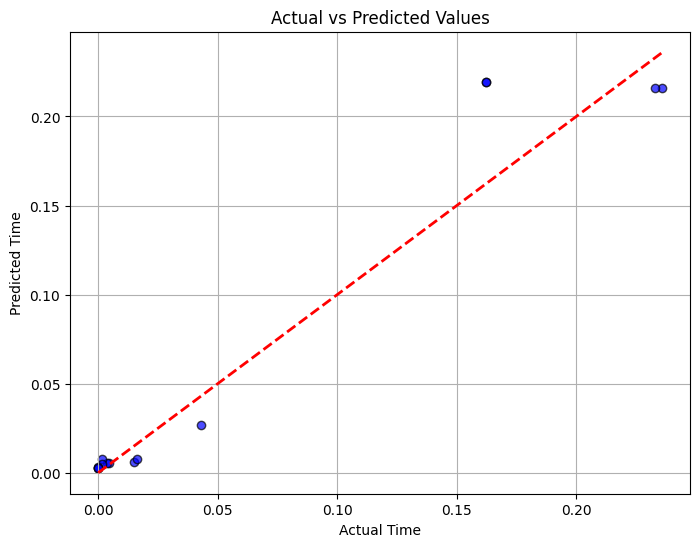

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Time')
plt.ylabel('Predicted Time')
plt.grid(True)
plt.show()
